# EDA Part 2: Looking at Two-Variables

Concepts:

Scatterplots
Covariance + Correlation (Linear and Rank???)

# Scatterplots

So far, we have looked at exploring one variable at a time through summary statistics, histograms, boxplots, etc.

What do we do when we have more than one numeric variable. We can start by visualizing the relationship between the variables through a scatterplot.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
mlb = pd.read_csv('../data/mlb_salaries.csv')

In [7]:
mlb.head()

,team,payroll,wins
0,Arizona Diamondbacks,96777231,85
1,Atlanta Braves,89551043,97
2,Baltimore Orioles,61124882,54
3,Boston Red Sox,187232500,84
4,Chicago Cubs,194081714,84


This dataframe contains the total team payroll and the number of wins for each Major League Baseball team during the 2019 season. We can start exploring this dataset by examining each of the variables one at a time.

In [8]:
mlb.describe()

,payroll,wins
count,3.000000e+01,30.000000
mean,1.054060e+08,80.966667
std,3.736332e+07,15.899433
min,4.908473e+07,47.000000
25%,8.390430e+07,70.250000
50%,1.004301e+08,82.500000
75%,1.253203e+08,93.000000
max,1.940817e+08,107.000000


We can see that payrolls range from about a \$50 million to almost \$200 million, with an average payroll of about \$100 million.

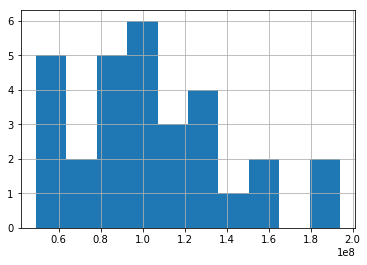

In [10]:
mlb.payroll.hist();

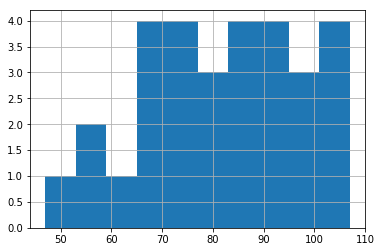

In [12]:
mlb.wins.hist();

We can look at these variables one at a time, but it might be more interesting to understand how they vary together. Do teams with higher payrolls tend to have more wins?

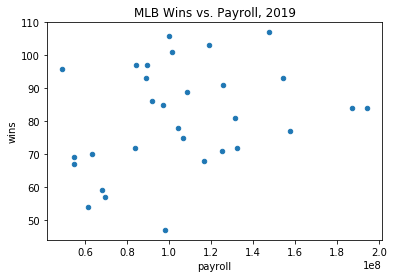

In [16]:
mlb.plot(kind = 'scatter', x = 'payroll', y = 'wins')
plt.title('MLB Wins vs. Payroll, 2019');

From the scatterplot, if you squint just right, you can make out a very slight upward trend, meaning that as payrolls increase, the number of wins tends to increase as well. But, this is not universally true. We have a team with the lowest payroll winning almost 100 games, and two teams with very large payrolls only winning about 84 games.

We'll now look at two ways to quantify the strength of a relationship between two variables.

## Covariance

For a dataset $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$ we define the **covariance** as

$$cov(X, Y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1}$$

where $\bar{x}$ is the mean of the $x_i$'s and $\bar{y}$ is the mean of the $y_i$'s.

To calculate the covariance of our dataset, we can use the `cov` function from `numpy`. This will return the *covariance matrix*, which shows the variance of each variable separately along with the covariance between variables.

In [31]:
import numpy as np

In [32]:
np.cov(mlb.payroll, mlb.wins)

array([[1.39601801e+15, 1.74793864e+08],
       [1.74793864e+08, 2.52791954e+02]])

The covariance is what is located in the upper right and the lower left entries.

So what does this measure?

Let's look at our plot of payrolls again.

In [21]:
payroll_mean = mlb.payroll.mean()
wins_mean = mlb.wins.mean()

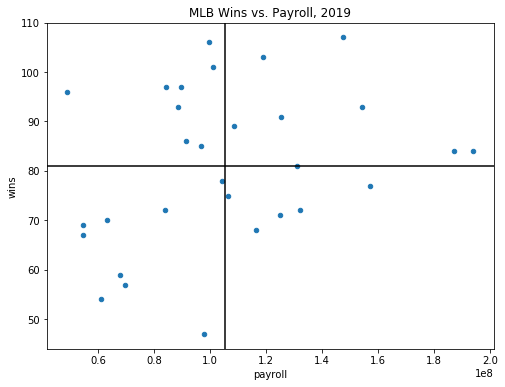

In [29]:
fig, ax = plt.subplots(figsize = (8,6))
mlb.plot(kind = 'scatter', x = 'payroll', y = 'wins', ax = ax)
plt.axvline(x = payroll_mean, color = 'black')
plt.axhline(y = wins_mean, color = 'black')
plt.title('MLB Wins vs. Payroll, 2019');

Points in the upper left quadrant have lower than average payroll and higher than average number of wins. Thus, $(x_i - \bar{x})(y_i - \bar{y})$ will be a negative number times a positive number, so negative overall.

Points in the lower left quadrant have lower than average payroll and lower than average number of wins. Thus, $(x_i - \bar{x})(y_i - \bar{y})$ will be a positive number times a positive number, so positive overall.

Similarly, for points in the upper right quadrant, $(x_i - \bar{x})(y_i - \bar{y})$ will be positive, and for points in the lower right, $(x_i - \bar{x})(y_i - \bar{y})$ will be negative.

If we have more points in the lower left and upper right, when finding the covariance, we will be adding a lot of positive numbers, so the outcome is likely to be positive.

If we have more points in the upper left and lower right, when finding the covariance, we will be adding a lot of negative numbers, so the outcome is likely to be negative.

These two scenarios correspond to a positive trend and a negative trend, respectively.

On the other hand, if points are roughly evenly spread around the four quadrants (no trend), then when finding the covariance, we will be adding a lot of both positive and negative values, so overall, the covariance will be close to zero.

Thus, by examining the sign and the magnitude of the covariance, we can get an idea of the existence or nonexistence of a trend in our data. But there is one major drawback, which is that the magnitude of $(x_i - \bar{x})$ and $(y_i - \bar{y})$ depend on the measurement scale of our variables. In this case, we are looking at millions of dollars on the one axis, and number of wins, which are in the ballpark of 50 to 110 on the other axis. So the differences corresponding to the salaries will far outweigh those for the number of wins.

What would be better would be a way to standardize these differences, so that we get a unitless measure of trend. This is exactly what the correlation does.

## (Pearson) Correlation

How can we normalize these differences? The most common way to do it is to convert it into units of standard deviations (by dividing the absolute differences by the standard deviation).

$$ r = \frac{\sum_{i=1}^n \frac{(x_i - \bar{x})}{s_X}\frac{(y_i - \bar{y})}{s_Y}}{n-1} = \frac{cov(X,Y)}{s_X \cdot s_Y} $$

Again, to find the correlation coefficient, we can use `numpy`.

In [46]:
np.corrcoef(mlb.payroll, mlb.wins)

array([[1.       , 0.2942382],
       [0.2942382, 1.       ]])

This shows that there the correlation between payroll and number of wins is roughly 0.294.

TODO: Add rule of thumb for correlation here.

Note: The pearson correlation measures the strength of a *linear* relationship between variables. That is, how strongly they follow a line. If we want to see this trendline, we can use the polyfit method from numpy. We'll learn much more about this trendline when we talk about linear regression later in the course.

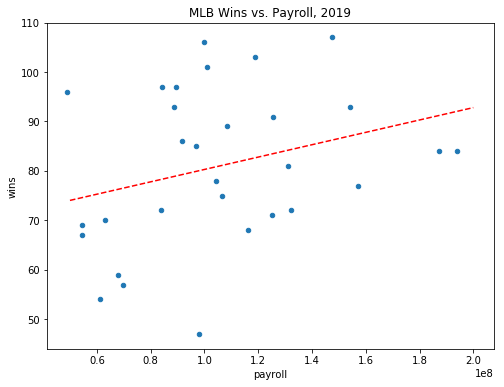

In [53]:
fig, ax = plt.subplots(figsize = (8,6))
mlb.plot(kind = 'scatter', x = 'payroll', y = 'wins', ax = ax)

x = np.linspace(50000000, 200000000, 100)
z = np.polyfit(mlb.payroll, mlb.wins, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('MLB Wins vs. Payroll, 2019');

TODO maybe: Add Spearman correlation coefficient.